<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import</a></span></li><li><span><a href="#image" data-toc-modified-id="image-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>image</a></span></li><li><span><a href="#model" data-toc-modified-id="model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>model</a></span><ul class="toc-item"><li><span><a href="#detect-face" data-toc-modified-id="detect-face-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>detect face</a></span></li><li><span><a href="#emotion_recognition" data-toc-modified-id="emotion_recognition-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>emotion_recognition</a></span></li><li><span><a href="#estimate_headpose" data-toc-modified-id="estimate_headpose-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>estimate_headpose</a></span></li><li><span><a href="#estimate_humanpose" data-toc-modified-id="estimate_humanpose-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>estimate_humanpose</a></span><ul class="toc-item"><li><span><a href="#2D" data-toc-modified-id="2D-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>2D</a></span></li><li><span><a href="#3D" data-toc-modified-id="3D-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>3D</a></span></li></ul></li><li><span><a href="#Instance-segmentation" data-toc-modified-id="Instance-segmentation-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Instance segmentation</a></span></li></ul></li></ul></div>

# import

In [1]:
# path_pose_extractor_build = '/Users/yuya/src/pyvino/pyvino/model/human_pose_estimation/human_3d_pose_estimator/pose_extractor/build'
path_pose_extractor_build = '/workspace/base_dir/pyvino/pyvino/model/human_pose_estimation/human_3d_pose_estimator/pose_extractor/build'

In [2]:
import sys
sys.path.append(path_pose_extractor_build)

In [3]:
from pyvino.model import (FaceDetector, 
                                              BodyDetector,
                                              HumanPoseDetector,
                                              Human3DPoseDetector,                          
                                              HeadPoseDetector,
                                              EmotionRecognizer,
                                              InstanceSegmentor)

In [4]:
import numpy as np
from PIL import Image
import cv2
from pyvino.util.config import TASKS 
from pyvino.util.image import cv2pil

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# image

In [5]:
path_image = '../data/test/person1.jpg'
input_image = cv2.imread(path_image)

# model

## detect face

In [6]:
model = FaceDetector()
#compute and return frame
results = model.compute(input_image)
output_image = results['frame']
output_image = cv2pil(output_image)
output_image

2019-12-29 05:59:32,391 - pyvino.model.base_model.base_model - INFO - face-detection-adas-0001 on Linux
2019-12-29 05:59:32,394 - pyvino.model.base_model.base_model - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so


RuntimeError: Unsupported primitive of type: PriorBox name: fc7_mbox_priorbox

## detect face

2019-12-29 05:55:05,254 - pyvino.model.object_detection.object_detector - INFO - person-detection-retail-0013 on Linux
2019-12-29 05:55:05,256 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so
2019-12-29 05:55:05,262 - pyvino.model.object_detection.object_detector - INFO - make config directory for saving file. Path: /home/ubuntu/src/pyvino/intel_models/person-detection-retail-0013/FP32
2019-12-29 05:55:06,218 - pyvino.model.object_detection.object_detector - INFO - download person-detection-retail-0013.xml successfully.
2019-12-29 05:55:06,696 - pyvino.model.object_detection.object_detector - INFO - download person-detection-retail-0013.bin successfully.


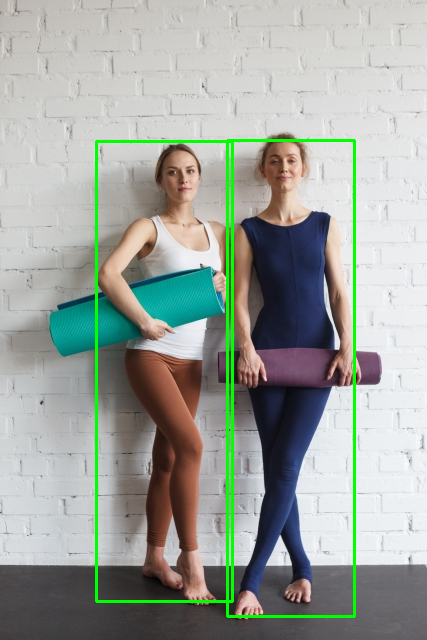

In [14]:
model = BodyDetector(model_dir='/home/ubuntu/src/pyvino/intel_models/')
#compute and return frame
results = model.compute(input_image)
output_image = results['frame']
output_image = cv2pil(output_image)
output_image

## emotion_recognition

2019-12-29 05:31:22,752 - pyvino.model.object_detection.object_detector - INFO - emotions-recognition-retail-0003 on Linux
2019-12-29 05:31:22,757 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so
2019-12-29 05:31:22,848 - pyvino.model.object_detection.object_detector - INFO - face-detection-adas-0001 on Linux
2019-12-29 05:31:22,849 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so


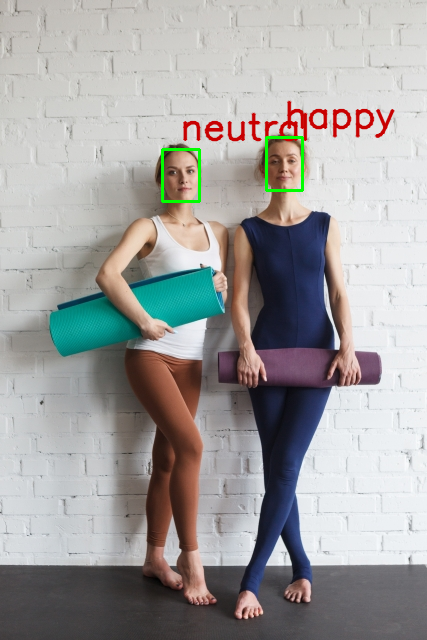

In [7]:
model = EmotionRecognizer()
#compute and return frame
results = model.compute(input_image)
output_image = results['frame']
output_image = cv2pil(output_image)
output_image

## estimate_headpose

2019-12-29 05:31:23,379 - pyvino.model.object_detection.object_detector - INFO - head-pose-estimation-adas-0001 on Linux
2019-12-29 05:31:23,382 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so
2019-12-29 05:31:23,458 - pyvino.model.object_detection.object_detector - INFO - face-detection-adas-0001 on Linux
2019-12-29 05:31:23,459 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so


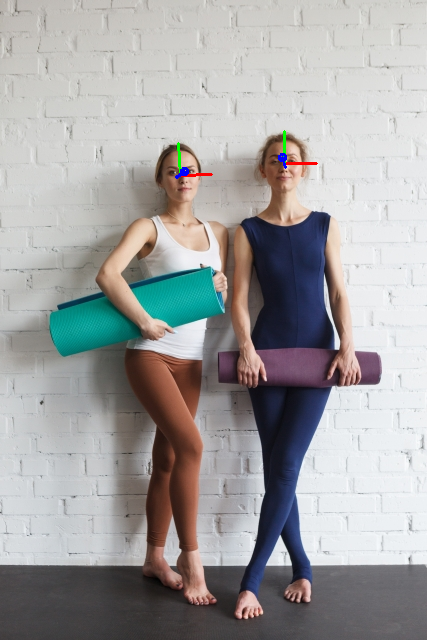

In [8]:
model = HeadPoseDetector()
#compute and return frame
results = model.compute(input_image)
output_image = results['frame']
output_image = cv2pil(output_image)
output_image

## estimate_humanpose

### 2D

2019-12-29 05:31:24,557 - pyvino.model.object_detection.object_detector - INFO - human-pose-estimation-0001 on Linux
2019-12-29 05:31:24,559 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so
2019-12-29 05:31:24,745 - pyvino.model.object_detection.object_detector - INFO - person-detection-retail-0013 on Linux
2019-12-29 05:31:24,746 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so
2019-12-29 05:31:25,071 - pyvino.model.object_detection.object_detector - INFO - instance-segmentation-security-0050 on Linux
2019-12-29 05:31:25,072 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so


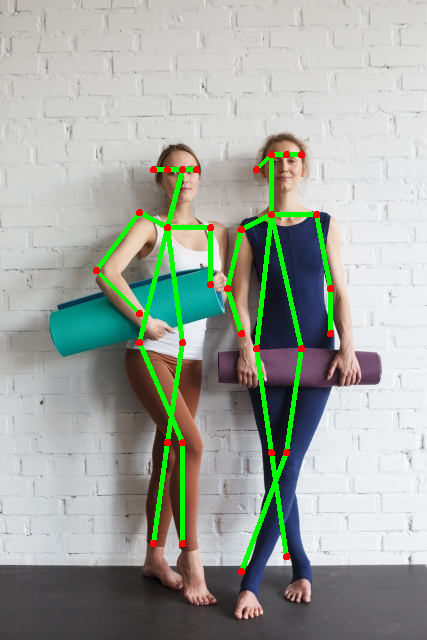

In [9]:
model = HumanPoseDetector()
#compute and return frame
results = model.compute(input_image)
output_image = results['frame']
output_image = cv2pil(output_image)
output_image

### 3D

2019-12-29 05:33:23,799 - pyvino.model.base_model.base_model - INFO - human-pose-estimation-3d on Linux
2019-12-29 05:33:23,802 - pyvino.model.base_model.base_model - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so


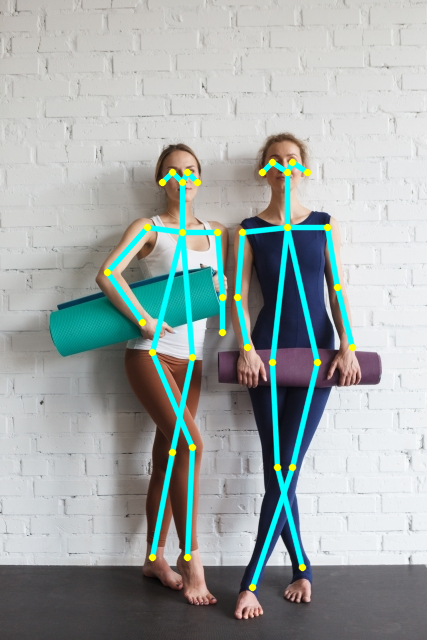

In [10]:
model = Human3DPoseDetector(model_dir='/home/ubuntu/src/pyvino/intel_models/')
#compute and return frame
results = model.compute(input_image)
output_image = results['frame']
output_image = cv2pil(output_image)
output_image

In [11]:
poses_2d = results['preds']['pose_2d']
poses_3d = results['preds']['pose_3d']
edges = results['preds']['edges']

In [12]:
body_edges = np.array(
    [[0, 1],  # neck - nose
     [1, 16], [16, 18],  # nose - l_eye - l_ear
     [1, 15], [15, 17],  # nose - r_eye - r_ear
     [0, 3], [3, 4], [4, 5],     # neck - l_shoulder - l_elbow - l_wrist
     [0, 9], [9, 10], [10, 11],  # neck - r_shoulder - r_elbow - r_wrist
     [0, 6], [6, 7], [7, 8],        # neck - l_hip - l_knee - l_ankle
     [0, 12], [12, 13], [13, 14]])  # neck - r_hip - r_knee - r_ankle

<IPython.core.display.Javascript object>


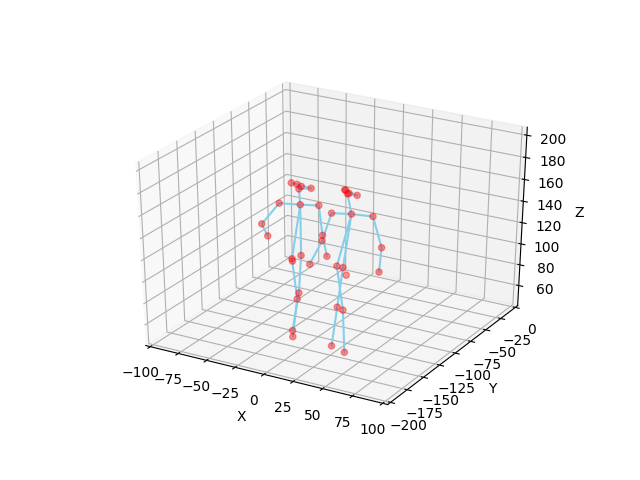

In [13]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for pose_3d in poses_3d:
    ax.scatter(pose_3d[:, 0], pose_3d[:, 1], pose_3d[:, 2], alpha=0.4, color='red')
    for body_edge in body_edges:
        ax.plot(
            (pose_3d[body_edge[0]][0], pose_3d[body_edge[1]][0]),
            (pose_3d[body_edge[0]][1], pose_3d[body_edge[1]][1]),
            (pose_3d[body_edge[0]][2], pose_3d[body_edge[1]][2]),
        color='skyblue')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-100,100)
    ax.set_ylim(100,200)
    ax.set_ylim(-200,0)
plt.show()

## Instance segmentation

2019-12-29 05:36:35,649 - pyvino.model.object_detection.object_detector - INFO - instance-segmentation-security-0050 on Linux
2019-12-29 05:36:35,652 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so


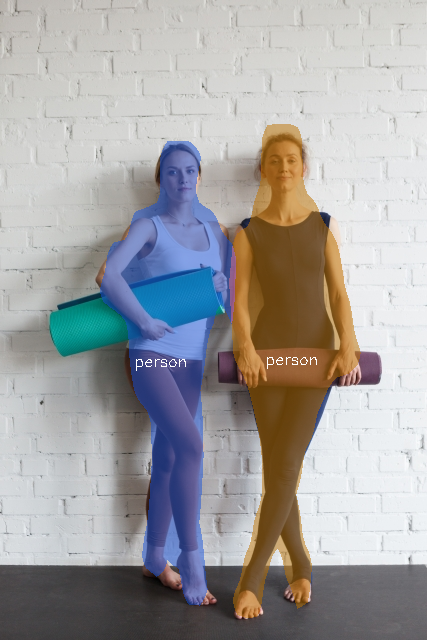

In [14]:
model = InstanceSegmentor()
#compute and return frame
results = model.compute(input_image)
output_image = results['frame']
output_image = cv2pil(output_image)
output_image